In [ ]:
%config FrozenModules.builtins = ''

In [ ]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk import pos_tag
from wordcloud import WordCloud
from nltk import FreqDist
from collections import Counter
from nltk import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

import warnings
warnings.filterwarnings('ignore')

# loading data

In [ ]:
df=pd.read_csv("financial_sentiment_data.csv")

In [ ]:
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [ ]:
df.head(10)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
5,$SPY wouldn't be surprised to see a green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
8,Kone 's net sales rose by some 14 % year-on-ye...,positive
9,The Stockmann department store will have a tot...,neutral


In [ ]:
df.tail(10)

,Sentence,Sentiment
5832,Operating profit fell to EUR 38.1 mn from EUR ...,negative
5833,"In 2008 , Kemira recorded revenue of approxima...",neutral
5834,Investments in product development stood at 6....,neutral
5835,HSBC Says Unit to Book $585 Million Charge on ...,negative
5836,Daily Mail parent company in talks with potent...,positive
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral
5841,HELSINKI AFX - KCI Konecranes said it has won ...,positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [ ]:
#columns

In [ ]:
df.columns

Index(['Sentence', 'Sentiment'], dtype='object')

# Data Cleaning

In [ ]:
#finding missing values

In [ ]:
missing_values=df.isnull().sum()

In [ ]:
missing_values

Sentence     0
Sentiment    0
dtype: int64

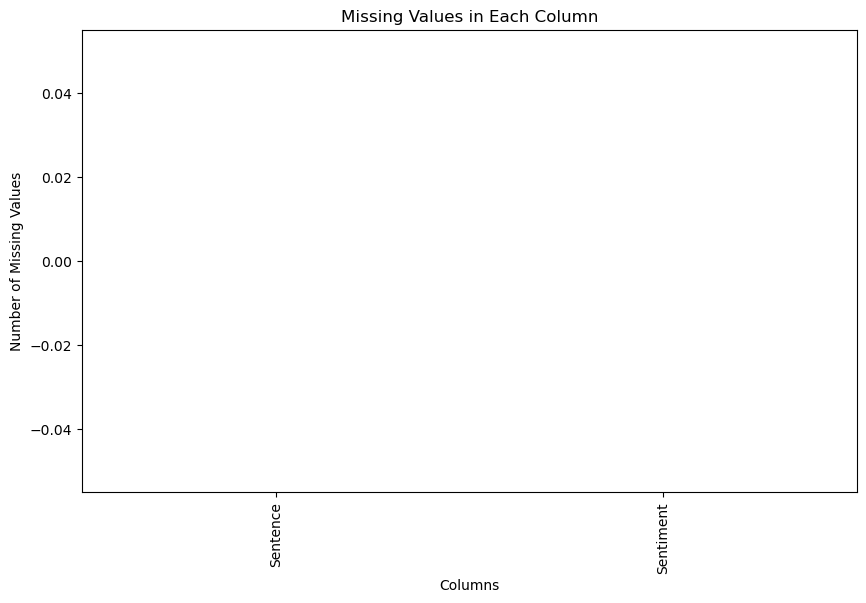

In [ ]:
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

# Sentiment

In [ ]:
#unique values in column sentiment

In [ ]:
df['Sentiment'].nunique()

3

In [ ]:
df['Sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [ ]:
 df['Sentiment'].value_counts()

Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64

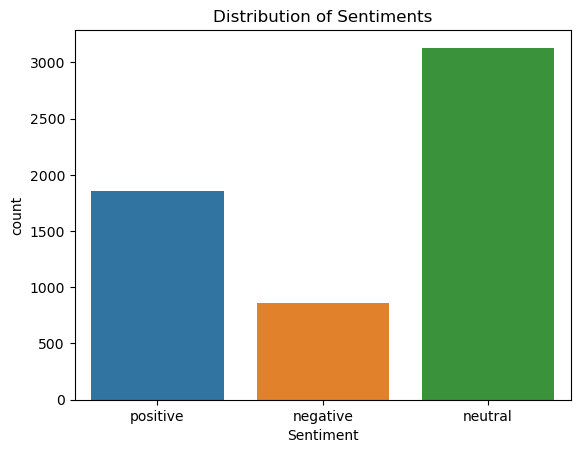

In [ ]:
#plotting sentiments
sns.countplot(x='Sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.show()

# Sentence

In [ ]:
#unique values in column sentence

In [ ]:
df['Sentence'].nunique()

5322

In [ ]:
df['Sentence'].unique()

array(["The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .",
       '$ESI on lows, down $1.50 to $2.50 BK a real possibility',
       "For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",
       ...,
       'Nordic Walking was first used as a summer training method by cross-country skiers .',
       'According shipping company Viking Line , the EU decision will have a significant financial impact .',
       'HELSINKI AFX - KCI Konecranes said it has won an order for four hot metal ladle cranes from Indian steel producer Bhushan Steel and Strips Ltd. .'],
      dtype=object)

In [ ]:
#understanding the data

In [ ]:
sentence1, sentiment1 = df["Sentence"][0], df["Sentiment"][0]


In [ ]:
sentence1

"The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model ."

In [ ]:
sentiment1

'positive'

In [ ]:
sentence2, sentiment2 = df["Sentence"][5832], df["Sentiment"][5832]


In [ ]:
sentence2

'Operating profit fell to EUR 38.1 mn from EUR 55.3 mn in 2007 .'

In [ ]:
sentiment2

'negative'

In [ ]:
sentence3, sentiment3 = df["Sentence"][3], df["Sentiment"][3]


In [ ]:
sentence3

'According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .'

In [ ]:
 sentiment3

'neutral'

In [ ]:
#duplicate columns

In [ ]:
sentence_duplicates = df[df['Sentence'].duplicated(keep=False)]

In [ ]:
sentence_duplicates

,Sentence,Sentiment
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
13,Viking Line has canceled some services .,neutral
41,Dolce & Gabbana has asked the European Union t...,negative
57,Diluted earnings per share ( EPS ) fell to EUR...,neutral
66,Finnish GeoSentric 's net sales decreased to E...,negative
...,...,...
5827,"( ADPnews ) - Oct 21 , 2009 - Finland-based IT...",negative
5831,Finnish developer and manufacturer of mobile p...,negative
5832,Operating profit fell to EUR 38.1 mn from EUR ...,negative
5837,RISING costs have forced packaging producer Hu...,negative


In [ ]:
sentence_duplicates.count()

Sentence     1040
Sentiment    1040
dtype: int64

In [ ]:
#all duplicates in the data frame

In [ ]:
all_duplicates = df[df.duplicated(keep=False)]

In [ ]:
all_duplicates

,Sentence,Sentiment
629,Proha Plc ( Euronext :7327 ) announced today (...,neutral
815,SSH Communications Security Corporation is hea...,neutral
1825,Proha Plc ( Euronext :7327 ) announced today (...,neutral
1859,SSH Communications Security Corporation is hea...,neutral
2234,Ahlstrom 's share is quoted on the NASDAQ OMX ...,neutral
2553,The issuer is solely responsible for the conte...,neutral
2672,Ahlstrom 's share is quoted on the NASDAQ OMX ...,neutral
3079,The company serves customers in various indust...,neutral
3272,The company serves customers in various indust...,neutral
3353,The report profiles 614 companies including ma...,neutral


In [ ]:
all_duplicates.count()

Sentence     12
Sentiment    12
dtype: int64

In [ ]:
all_duplicates.nunique()

Sentence     6
Sentiment    1
dtype: int64

In [ ]:
all_duplicate_counts = all_duplicates['Sentence'].value_counts()


In [ ]:
all_duplicate_counts

Sentence
Proha Plc ( Euronext :7327 ) announced today ( 19 May ) that its fully-owned subsidiary , Safran Software Solutions AS , has agreed to sell its 49 % share of Safran North America LLC to a SNA Holding AS , an investment group based in Norway .                                                          2
SSH Communications Security Corporation is headquartered in Helsinki , Finland .                                                                                                                                                                                                                            2
Ahlstrom 's share is quoted on the NASDAQ OMX Helsinki .                                                                                                                                                                                                                                                    2
The issuer is solely responsible for the content of this announcement .              

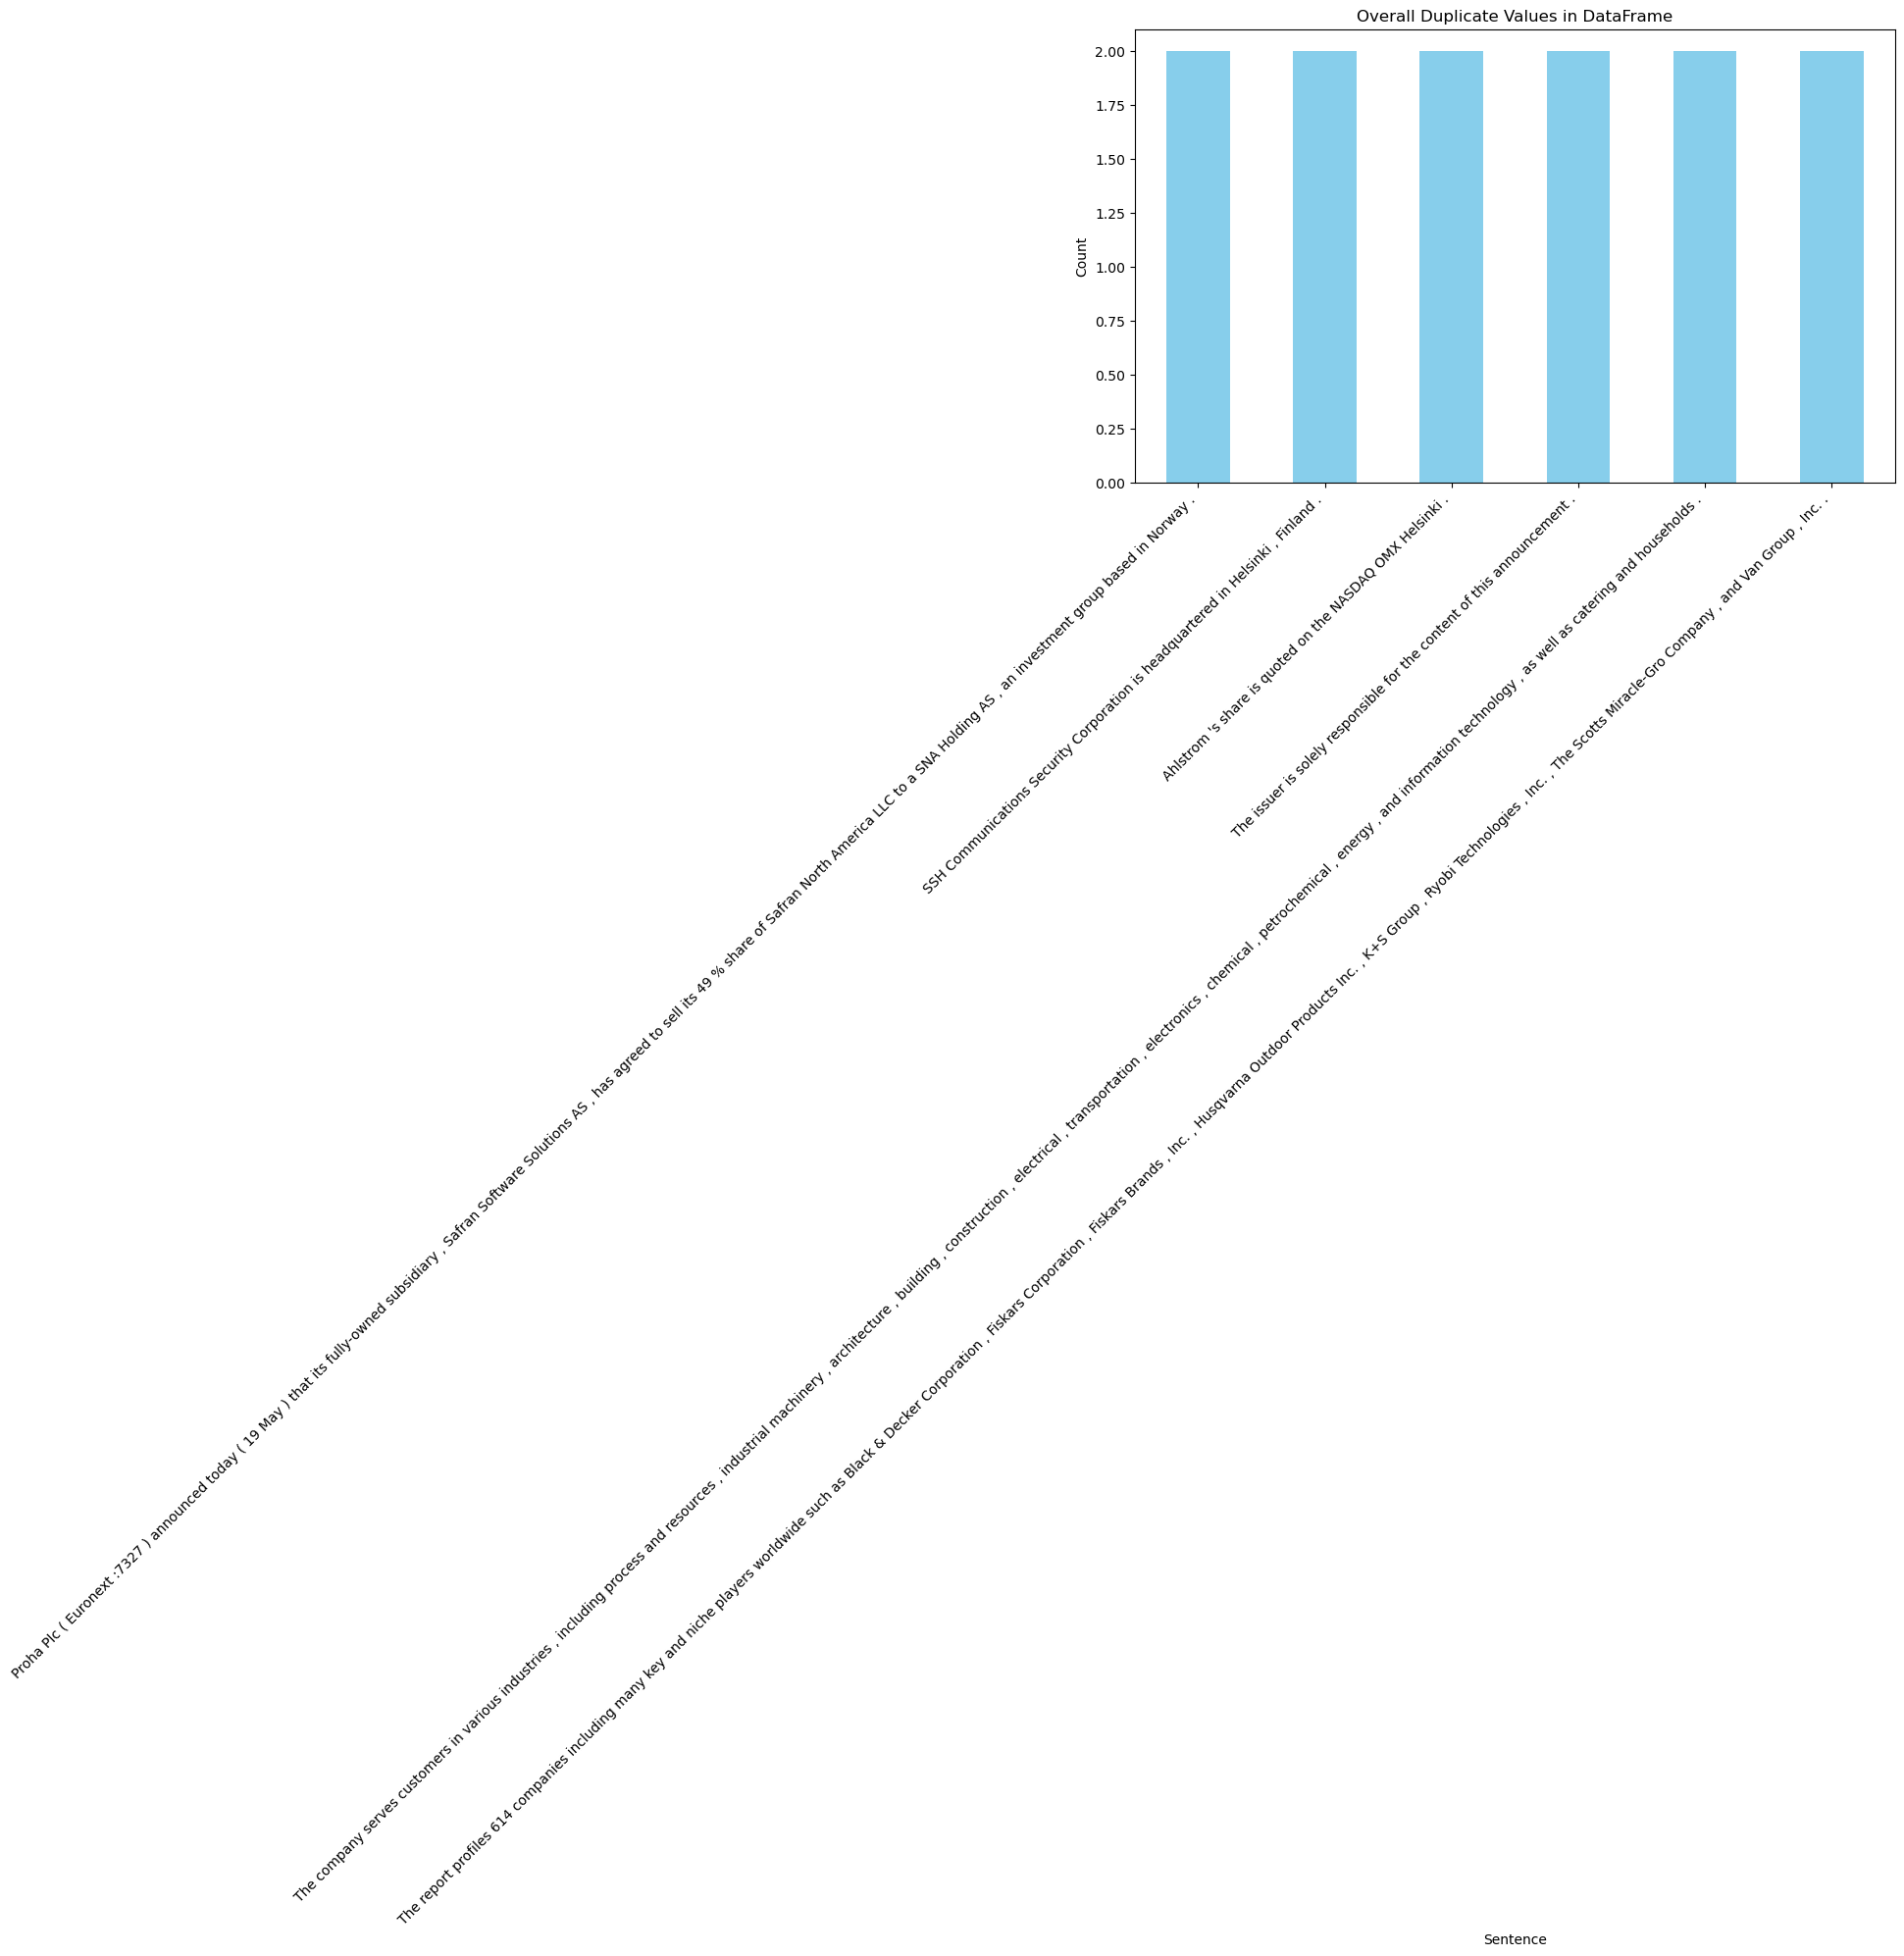

In [ ]:
# Plot a bar chart
plt.figure(figsize=(10, 6))
all_duplicate_counts.plot(kind='bar', color='skyblue')
plt.title('Overall Duplicate Values in DataFrame')
plt.xlabel('Sentence')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Remove overall duplicates in the entire DataFrame
df_no_duplicates = df.drop_duplicates()

In [ ]:
# Display the resulting DataFrames
print("DataFrame without overall duplicates:")
df_no_duplicates

DataFrame without overall duplicates:


,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [ ]:
df=df_no_duplicates.copy()

# text processing

In [ ]:
#cleaning data frame in the means of white spaces,special characters and numbers
df['Sentence'] = df['Sentence'].str.replace('-', ' ')

In [ ]:
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


removing special characters and numbers

In [ ]:
def clean_data(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

In [ ]:
#putting the cleaned data into another coumn named"Sentence_clean"

In [ ]:
df['Clean_Sentence'] = df['Sentence'].apply(clean_data)
df.head(5)

,Sentence,Sentiment,Clean_Sentence
0,The GeoSolutions technology will leverage Bene...,positive,The GeoSolutions technology will leverage Bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,ESI on lows down to BK a real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,For the last quarter of Componenta s net sal...
3,According to the Finnish Russian Chamber of Co...,neutral,According to the Finnish Russian Chamber of Co...
4,The Swedish buyout firm has sold its remaining...,neutral,The Swedish buyout firm has sold its remaining...


case changing

In [ ]:
#chaning the word case in the  column "sentence_clean" in the data frame

In [ ]:
df['Clean_Sentence'] = df['Clean_Sentence'].str.lower()

In [ ]:
df

,Sentence,Sentiment,Clean_Sentence
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi on lows down to bk a real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,for the last quarter of componenta s net sal...
3,According to the Finnish Russian Chamber of Co...,neutral,according to the finnish russian chamber of co...
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...
...,...,...,...
5837,RISING costs have forced packaging producer Hu...,negative,rising costs have forced packaging producer hu...
5838,Nordic Walking was first used as a summer trai...,neutral,nordic walking was first used as a summer trai...
5839,"According shipping company Viking Line , the E...",neutral,according shipping company viking line the eu...
5840,"In the building and home improvement trade , s...",neutral,in the building and home improvement trade sa...


In [ ]:
#after removing all white spaces and numbers and special characters and lowering the word cases putting data into "train_df" data frame

In [ ]:
train_df=pd.DataFrame(df)

In [ ]:
train_df

,Sentence,Sentiment,Clean_Sentence
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi on lows down to bk a real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,for the last quarter of componenta s net sal...
3,According to the Finnish Russian Chamber of Co...,neutral,according to the finnish russian chamber of co...
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...
...,...,...,...
5837,RISING costs have forced packaging producer Hu...,negative,rising costs have forced packaging producer hu...
5838,Nordic Walking was first used as a summer trai...,neutral,nordic walking was first used as a summer trai...
5839,"According shipping company Viking Line , the E...",neutral,according shipping company viking line the eu...
5840,"In the building and home improvement trade , s...",neutral,in the building and home improvement trade sa...


tokenization

In [ ]:
# Tokenize the 'Clean_Sentence' column
train_df['tokenized_Clean_Sentence'] = train_df['Clean_Sentence'].apply(lambda x: word_tokenize(x))

In [ ]:
train_df['Clean_Sentence']

0       the geosolutions technology will leverage bene...
1             esi on lows down  to  bk a real possibility
2       for the last quarter of   componenta s net sal...
3       according to the finnish russian chamber of co...
4       the swedish buyout firm has sold its remaining...
                              ...                        
5837    rising costs have forced packaging producer hu...
5838    nordic walking was first used as a summer trai...
5839    according shipping company viking line  the eu...
5840    in the building and home improvement trade  sa...
5841    helsinki afx   kci konecranes said it has won ...
Name: Clean_Sentence, Length: 5836, dtype: object

In [ ]:
train_df['tokenized_Clean_Sentence']

0       [the, geosolutions, technology, will, leverage...
1       [esi, on, lows, down, to, bk, a, real, possibi...
2       [for, the, last, quarter, of, componenta, s, n...
3       [according, to, the, finnish, russian, chamber...
4       [the, swedish, buyout, firm, has, sold, its, r...
                              ...                        
5837    [rising, costs, have, forced, packaging, produ...
5838    [nordic, walking, was, first, used, as, a, sum...
5839    [according, shipping, company, viking, line, t...
5840    [in, the, building, and, home, improvement, tr...
5841    [helsinki, afx, kci, konecranes, said, it, has...
Name: tokenized_Clean_Sentence, Length: 5836, dtype: object

In [ ]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
train_df['Lemmatized_Sentence'] = train_df['Clean_Sentence'].apply(
    lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kkoll\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
train_df

,Sentence,Sentiment,Clean_Sentence,tokenized_Clean_Sentence,Lemmatized_Sentence
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...,"[the, geosolutions, technology, will, leverage...","[t, h, e, , g, e, o, s, o, l, u, t, i, o, n, ..."
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi on lows down to bk a real possibility,"[esi, on, lows, down, to, bk, a, real, possibi...","[e, s, i, , o, n, , l, o, w, s, , d, o, w, ..."
2,"For the last quarter of 2010 , Componenta 's n...",positive,for the last quarter of componenta s net sal...,"[for, the, last, quarter, of, componenta, s, n...","[f, o, r, , t, h, e, , l, a, s, t, , q, u, ..."
3,According to the Finnish Russian Chamber of Co...,neutral,according to the finnish russian chamber of co...,"[according, to, the, finnish, russian, chamber...","[a, c, c, o, r, d, i, n, g, , t, o, , t, h, ..."
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...,"[the, swedish, buyout, firm, has, sold, its, r...","[t, h, e, , s, w, e, d, i, s, h, , b, u, y, ..."
...,...,...,...,...,...
5837,RISING costs have forced packaging producer Hu...,negative,rising costs have forced packaging producer hu...,"[rising, costs, have, forced, packaging, produ...","[r, i, s, i, n, g, , c, o, s, t, s, , h, a, ..."
5838,Nordic Walking was first used as a summer trai...,neutral,nordic walking was first used as a summer trai...,"[nordic, walking, was, first, used, as, a, sum...","[n, o, r, d, i, c, , w, a, l, k, i, n, g, , ..."
5839,"According shipping company Viking Line , the E...",neutral,according shipping company viking line the eu...,"[according, shipping, company, viking, line, t...","[a, c, c, o, r, d, i, n, g, , s, h, i, p, p, ..."
5840,"In the building and home improvement trade , s...",neutral,in the building and home improvement trade sa...,"[in, the, building, and, home, improvement, tr...","[i, n, , t, h, e, , b, u, i, l, d, i, n, g, ..."


stopwords

In [ ]:
#removing stop words

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
# Remove stop words from each tokenized sentence
train_df['tokenized_Clean_Sentence_without_stopwords'] = train_df['tokenized_Clean_Sentence'].apply(
    lambda tokens: [word for word in tokens if word.lower() not in stop_words])
train_df['tokenized_Clean_Sentence']

0       [the, geosolutions, technology, will, leverage...
1       [esi, on, lows, down, to, bk, a, real, possibi...
2       [for, the, last, quarter, of, componenta, s, n...
3       [according, to, the, finnish, russian, chamber...
4       [the, swedish, buyout, firm, has, sold, its, r...
                              ...                        
5837    [rising, costs, have, forced, packaging, produ...
5838    [nordic, walking, was, first, used, as, a, sum...
5839    [according, shipping, company, viking, line, t...
5840    [in, the, building, and, home, improvement, tr...
5841    [helsinki, afx, kci, konecranes, said, it, has...
Name: tokenized_Clean_Sentence, Length: 5836, dtype: object

In [ ]:
train_df['tokenized_Clean_Sentence_without_stopwords']

0       [geosolutions, technology, leverage, benefon, ...
1                      [esi, lows, bk, real, possibility]
2       [last, quarter, componenta, net, sales, double...
3       [according, finnish, russian, chamber, commerc...
4       [swedish, buyout, firm, sold, remaining, perce...
                              ...                        
5837    [rising, costs, forced, packaging, producer, h...
5838    [nordic, walking, first, used, summer, trainin...
5839    [according, shipping, company, viking, line, e...
5840    [building, home, improvement, trade, sales, de...
5841    [helsinki, afx, kci, konecranes, said, order, ...
Name: tokenized_Clean_Sentence_without_stopwords, Length: 5836, dtype: object

In [ ]:
train_df

,Sentence,Sentiment,Clean_Sentence,tokenized_Clean_Sentence,Lemmatized_Sentence,tokenized_Clean_Sentence_without_stopwords
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...,"[the, geosolutions, technology, will, leverage...","[t, h, e, , g, e, o, s, o, l, u, t, i, o, n, ...","[geosolutions, technology, leverage, benefon, ..."
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi on lows down to bk a real possibility,"[esi, on, lows, down, to, bk, a, real, possibi...","[e, s, i, , o, n, , l, o, w, s, , d, o, w, ...","[esi, lows, bk, real, possibility]"
2,"For the last quarter of 2010 , Componenta 's n...",positive,for the last quarter of componenta s net sal...,"[for, the, last, quarter, of, componenta, s, n...","[f, o, r, , t, h, e, , l, a, s, t, , q, u, ...","[last, quarter, componenta, net, sales, double..."
3,According to the Finnish Russian Chamber of Co...,neutral,according to the finnish russian chamber of co...,"[according, to, the, finnish, russian, chamber...","[a, c, c, o, r, d, i, n, g, , t, o, , t, h, ...","[according, finnish, russian, chamber, commerc..."
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...,"[the, swedish, buyout, firm, has, sold, its, r...","[t, h, e, , s, w, e, d, i, s, h, , b, u, y, ...","[swedish, buyout, firm, sold, remaining, perce..."
...,...,...,...,...,...,...
5837,RISING costs have forced packaging producer Hu...,negative,rising costs have forced packaging producer hu...,"[rising, costs, have, forced, packaging, produ...","[r, i, s, i, n, g, , c, o, s, t, s, , h, a, ...","[rising, costs, forced, packaging, producer, h..."
5838,Nordic Walking was first used as a summer trai...,neutral,nordic walking was first used as a summer trai...,"[nordic, walking, was, first, used, as, a, sum...","[n, o, r, d, i, c, , w, a, l, k, i, n, g, , ...","[nordic, walking, first, used, summer, trainin..."
5839,"According shipping company Viking Line , the E...",neutral,according shipping company viking line the eu...,"[according, shipping, company, viking, line, t...","[a, c, c, o, r, d, i, n, g, , s, h, i, p, p, ...","[according, shipping, company, viking, line, e..."
5840,"In the building and home improvement trade , s...",neutral,in the building and home improvement trade sa...,"[in, the, building, and, home, improvement, tr...","[i, n, , t, h, e, , b, u, i, l, d, i, n, g, ...","[building, home, improvement, trade, sales, de..."


In [ ]:
word_counts = Counter([word for words in train_df['tokenized_Clean_Sentence_without_stopwords'] for word in words])
word_counts

Counter({'eur': 1630,
         'mn': 821,
         'company': 807,
         'profit': 569,
         'sales': 562,
         'finnish': 539,
         'said': 516,
         'net': 500,
         'million': 494,
         'year': 479,
         'operating': 371,
         'mln': 350,
         'quarter': 342,
         'finland': 338,
         'period': 335,
         'group': 326,
         'share': 290,
         'new': 282,
         'oyj': 250,
         'business': 250,
         'first': 245,
         'market': 239,
         'shares': 228,
         'loss': 221,
         'also': 211,
         'euro': 209,
         'compared': 199,
         'services': 194,
         'today': 193,
         'helsinki': 174,
         'corresponding': 158,
         'per': 155,
         'percent': 150,
         'operations': 150,
         'total': 144,
         'contract': 143,
         'price': 135,
         'financial': 135,
         'bank': 131,
         'decreased': 131,
         'nokia': 127,
         'based': 126

extracting nouns for further analysis

In [ ]:
#extracting nouns from the 'tokenized_Clean_Sentence_without_stopwords'

In [ ]:
# Function to extract nouns from tokenized sentences
def extract_nouns(tokens):
    tagged_tokens = pos_tag(tokens)
    nouns = [token[0] for token in tagged_tokens if token[1].startswith('N')]
    return nouns

In [ ]:
# Apply noun extraction to the 'tokenized_Clean_Sentence_without_stopwords' column
train_df['extracted_nouns'] = train_df['tokenized_Clean_Sentence_without_stopwords'].apply(extract_nouns)
train_df['extracted_nouns']

In [ ]:
#extracting neutral sentiments from the cleaned data set
neutral_rows = train_df[train_df['Sentiment'] == 'neutral']
neutral_rows

In [ ]:
#extracting positive sentiment  rows from the cleaned data set
positive_rows = train_df[train_df['Sentiment'] == 'positive']
positive_rows

In [ ]:
#extracting positive sentiment  rows from the cleaned data set
negative_rows = train_df[train_df['Sentiment'] == 'negative']
negative_rows

In [ ]:
train_df

# Explaratory Data Analysis

1.word clouds

In [ ]:
def generate_word_cloud(words, title):
    # Convert each word to a string to handle potential non-string elements
    words = [str(word) for word in words]

    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()


In [ ]:
# Generate word clouds for each sentiment
generate_word_cloud(positive_rows['extracted_nouns'].explode().tolist(), 'Positive Sentiment Word Cloud')

In [ ]:
generate_word_cloud(neutral_rows['extracted_nouns'].explode().tolist(), 'Neutral Sentiment Word Cloud')

In [ ]:
generate_word_cloud(negative_rows['extracted_nouns'].explode().tolist(), 'Negative Sentiment Word Cloud')

2. Bar Plots of Word Frequency

In [ ]:
word_frequency = Counter([word for sublist in train_df['tokenized_Clean_Sentence_without_stopwords'] for word in sublist])
top_words = word_frequency.most_common(10)
plt.figure(figsize=(10, 6))
plt.bar(*zip(*top_words))
plt.title('Top 10 Words in the Dataset')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

3. Sentiment Distribution

In [ ]:
sentiment_distribution = train_df['Sentiment'].value_counts()
plt.figure(figsize=(8, 5))
sentiment_distribution.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
#pie chart
plt.figure(figsize=(8, 8))
train_df['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Sentiment Distribution')
plt.show()

4.Noun Frequency Analysis

In [ ]:
all_nouns = [noun for sublist in train_df['extracted_nouns'] for noun in sublist]
noun_freq = FreqDist(all_nouns)

In [ ]:
top_n_nouns = 20

In [ ]:
plt.figure(figsize=(10, 6))
# Extract top N nouns and their frequencies
top_n_nouns_data = noun_freq.most_common(top_n_nouns)
top_nouns, frequencies = zip(*top_n_nouns_data)
# Creating  a bar plot
plt.bar(top_nouns, frequencies, color='skyblue')
plt.title(f'Top {top_n_nouns} Most Frequent Nouns')
plt.xlabel('Nouns')
plt.ylabel('Frequency')
# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')
plt.show()


# feature engineering

In [ ]:
# Create a new column with sentences
train_df['cleaned_Sentence'] = train_df['tokenized_Clean_Sentence_without_stopwords'].apply(lambda x: ' '.join(x))

# Display the modified DataFrame with the new column
train_df[['Sentence', 'cleaned_Sentence']]

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Perform label encoding for the "Sentiment" column
label_encoder = LabelEncoder()
train_df['Encoded_Sentiment'] = label_encoder.fit_transform(train_df['Sentiment'])

# Display the modified DataFrame
train_df[['Sentiment','Encoded_Sentiment']]


finding sentiment polarity for the cleaned_sentence using textblob

In [ ]:
from textblob import TextBlob

In [ ]:
from textblob import TextBlob
# Creating sentiment polarity for the cleaned_Sentence column
train_df['Sentiment_Polarity_Cleaned'] = train_df['cleaned_Sentence'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
# Converting sentiment polarity to sentiment labels
train_df['Sentiment_Label_Cleaned'] = train_df['Sentiment_Polarity_Cleaned'].apply(
    lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))

In [ ]:
# Perform label encoding for the "Sentiment" column
label_encoder = LabelEncoder()
train_df['Sentiment_Label_Encoded'] = label_encoder.fit_transform(train_df['Sentiment_Label_Cleaned'])

# Display the modified DataFrame
train_df[['Sentiment_Label_Cleaned','Sentiment_Label_Encoded']]

In [ ]:
train_df.head(10)

In [ ]:
final_df=pd.DataFrame(train_df[['Sentence','Sentiment','cleaned_Sentence','Encoded_Sentiment','Sentiment_Polarity_Cleaned','Sentiment_Label_Cleaned','Sentiment_Label_Encoded']])

In [ ]:
final_df.head(5)

In [ ]:
word_counts = Counter([word for words in train_df['tokenized_Clean_Sentence_without_stopwords'] for word in words])
word_counts

# Feature extraction

UNI-GRAM Analysis

In [ ]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import ngrams
import pandas as pd

# Function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and special characters
    text = ''.join([char for char in text if char not in string.punctuation and char.isalnum() or char.isspace()])

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return tokens

# Tokenize and preprocess the sentences into words
train_df['tokenized_words'] = train_df['cleaned_Sentence'].apply(preprocess_text)

# Extract unigrams
train_df['unigrams'] = train_df['tokenized_words'].apply(lambda x: list(ngrams(x, 1)))

# Flatten the list of unigrams
all_unigrams = [unigram for sentence_unigrams in train_df['unigrams'] for unigram in sentence_unigrams]

# Convert the results to a DataFrame for visualization
unigrams_df = pd.DataFrame(all_unigrams, columns=['Word1'])

# Display the most common unigrams
common_unigrams = unigrams_df['Word1'].value_counts().reset_index().rename(columns={'index': 'Word1', 'Word1': 'Frequency'})
print(common_unigrams.head(10))

In [ ]:
# Display the most common unigrams
top_n = 10
common_unigrams.columns = ['Word1', 'Frequency']  # Assuming the correct column names
common_unigrams['Word1'] = common_unigrams['Word1'].astype(str)  # Convert 'Word1' column to string type


In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word1', data=common_unigrams.head(top_n), palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title(f'Top {top_n} Most Common Unigrams')
plt.show()

BI-GRAM ANALYSIS

In [ ]:
# Extract bigrams
train_df['bigrams'] = train_df['tokenized_words'].apply(lambda x: list(ngrams(x, 2)))

# Flatten the list of bigrams
all_bigrams = [bigram for sentence_bigrams in train_df['bigrams'] for bigram in sentence_bigrams]

# Convert the results to a DataFrame for visualization
bigrams_df = pd.DataFrame(all_bigrams, columns=['Word1', 'Word2'])

# Combine the two words in each bigram into a single string for better visualization
bigrams_df['Bigram'] = bigrams_df['Word1'] + ' ' + bigrams_df['Word2']

# Display the most common bigrams
common_bigrams = bigrams_df['Bigram'].value_counts().reset_index().rename(columns={'index': 'Bigram', 'Bigram': 'Frequency'})
print(common_bigrams.head(10))

In [ ]:
# Display the most common unigrams
top_n = 10
common_bigrams.columns = ['Word1', 'Frequency']  # Assuming the correct column names
common_bigrams['Word1'] = common_bigrams['Word1'].astype(str)  # Convert 'Word1' column to string type


In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word1', data=common_bigrams.head(top_n), palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title(f'Top {top_n} Most Common bigrams')
plt.show()

TRI-GRAM ANALYSIS

In [ ]:
# Extract trigrams
train_df['trigrams'] = train_df['tokenized_words'].apply(lambda x: list(ngrams(x, 3)))

# Flatten the list of trigrams
all_trigrams = [trigram for sentence_trigrams in train_df['trigrams'] for trigram in sentence_trigrams]

# Convert the results to a DataFrame for visualization
trigrams_df = pd.DataFrame(all_trigrams, columns=['Word1', 'Word2', 'Word3'])

# Combine the three words in each trigram into a single string for better visualization
trigrams_df['Trigram'] = trigrams_df['Word1'] + ' ' + trigrams_df['Word2'] + ' ' + trigrams_df['Word3']

# Display the most common trigrams
common_trigrams = trigrams_df['Trigram'].value_counts().reset_index().rename(columns={'index': 'Trigram', 'Trigram': 'Frequency'})
print(common_trigrams.head(10))

In [ ]:
# Display the most common unigrams
top_n = 10
common_trigrams.columns = ['Word1', 'Frequency']  # Assuming the correct column names
common_trigrams['Word1'] = common_trigrams['Word1'].astype(str)  # Convert 'Word1' column to string type


In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word1', data=common_trigrams.head(top_n), palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title(f'Top {top_n} Most Common trigrams')
plt.show()

In [ ]:
final_df

In [ ]:
import pandas as pd

# Assuming final_df is your DataFrame
# Replace 'output_file.csv' with your desired file name and path
csv_file_path = 'final_df.csv'

# Save the DataFrame to a CSV file
final_df.to_csv(csv_file_path, index=False)

print(f"CSV file '{csv_file_path}' has been created.")

In [ ]:
final_df

# Model building

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(final_df['cleaned_Sentence'], final_df['Sentiment_Label_Encoded'], test_size=0.2, random_state=42)
# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# ensemble method to improve model

#XG BOOST

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', XGBClassifier())
])

In [ ]:
model.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import accuracy_score

# Predictions on the training set
y_train_pred = model.predict(X_train)

# Predictions on the test set (already done in your code)
y_test_pred = model.predict(X_test)

# Calculate training accuracy
accuracy_train = accuracy_score(y_train, y_train_pred)

# Calculate test accuracy
accuracy_test = accuracy_score(y_test, y_test_pred)

In [ ]:
# Print the accuracies
print(f'Training Accuracy: {accuracy_train:.2f}')
print(f'Test Accuracy: {accuracy_test:.2f}')

In [ ]:
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:\n', classification_rep)
print('\nConfusion Matrix:\n', conf_matrix)

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Overview:
The baseline model, which predicts all instances as class 1, achieves an accuracy of 54%.

We improved model achieves a significantly higher accuracy of 90%, demonstrating its effectiveness.

The improved model shows good precision, recall, and F1-score for all classes, indicating a balanced performance across the different sentiment classes.

The confusion matrix for the improved model provides a detailed breakdown of correct and incorrect predictions for each class.

In [ ]:
from joblib import dump

In [ ]:
dump(model, 'model.sav')